In [1]:
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from matplotlib import pyplot as plt
from warnings import filterwarnings

filterwarnings(action='ignore')

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(
                  lr=0.1, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


2022-02-26 16:20:19.059735: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-26 16:20:19.059949: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-26 16:20:19.060637: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [2]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2022-02-26 16:20:33.901607: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-26 16:20:33.901995: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2593900000 Hz


Epoch 1/12
469/469 [==============================] - 9s 17ms/step - loss: 1.3532 - accuracy: 0.5626 - val_loss: 0.2127 - val_accuracy: 0.9375
Epoch 2/12
469/469 [==============================] - 8s 16ms/step - loss: 0.2026 - accuracy: 0.9392 - val_loss: 0.1415 - val_accuracy: 0.9585
Epoch 3/12
469/469 [==============================] - 7s 16ms/step - loss: 0.1443 - accuracy: 0.9577 - val_loss: 0.1155 - val_accuracy: 0.9663
Epoch 4/12
469/469 [==============================] - 8s 16ms/step - loss: 0.1174 - accuracy: 0.9653 - val_loss: 0.0966 - val_accuracy: 0.9714
Epoch 5/12
469/469 [==============================] - 9s 18ms/step - loss: 0.0961 - accuracy: 0.9716 - val_loss: 0.0906 - val_accuracy: 0.9714
Epoch 6/12
469/469 [==============================] - 8s 17ms/step - loss: 0.0892 - accuracy: 0.9731 - val_loss: 0.0750 - val_accuracy: 0.9776
Epoch 7/12
469/469 [==============================] - 8s 16ms/step - loss: 0.0839 - accuracy: 0.9754 - val_loss: 0.0689 - val_accuracy: 0.9791

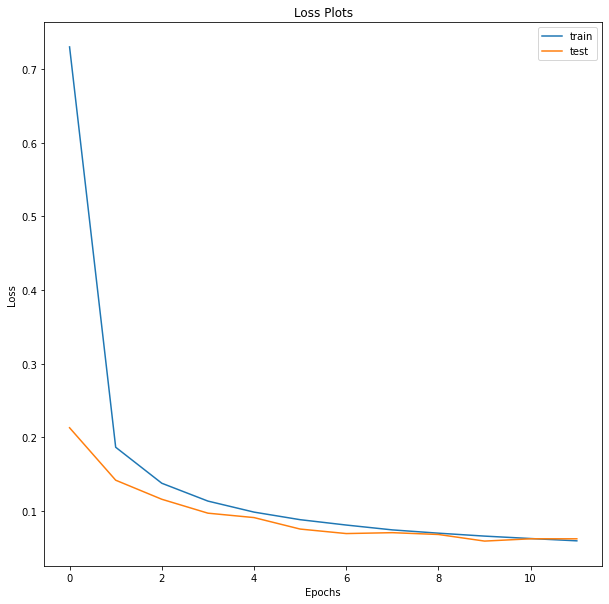

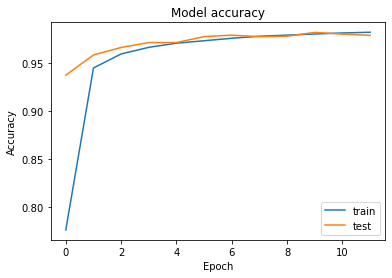

In [3]:
fig = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Plots")
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()